In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

### Task1
#### Create a clean chart for the plot below. And a summary of steps you took to modify this plot.

<img src="bad_visual.png" width="450">

In [1]:
 df_cars = pd.read_csv("cars_data.csv")
df_cars = df_cars.set_index('month') 
df_cars['2018k'] = df_cars['2018']*1000
df_cars['2019k'] = df_cars['2019']*1000
df_cars

,2018,2019,2018k,2019k
month,,,,
January,38,101,38000,101000
February,47,78,47000,78000
March,49,91,49000,91000
April,42,77,42000,77000
May,42,78,42000,78000
June,38,71,38000,71000
July,43,78,43000,78000
August,52,62,52000,62000
September,49,68,49000,68000


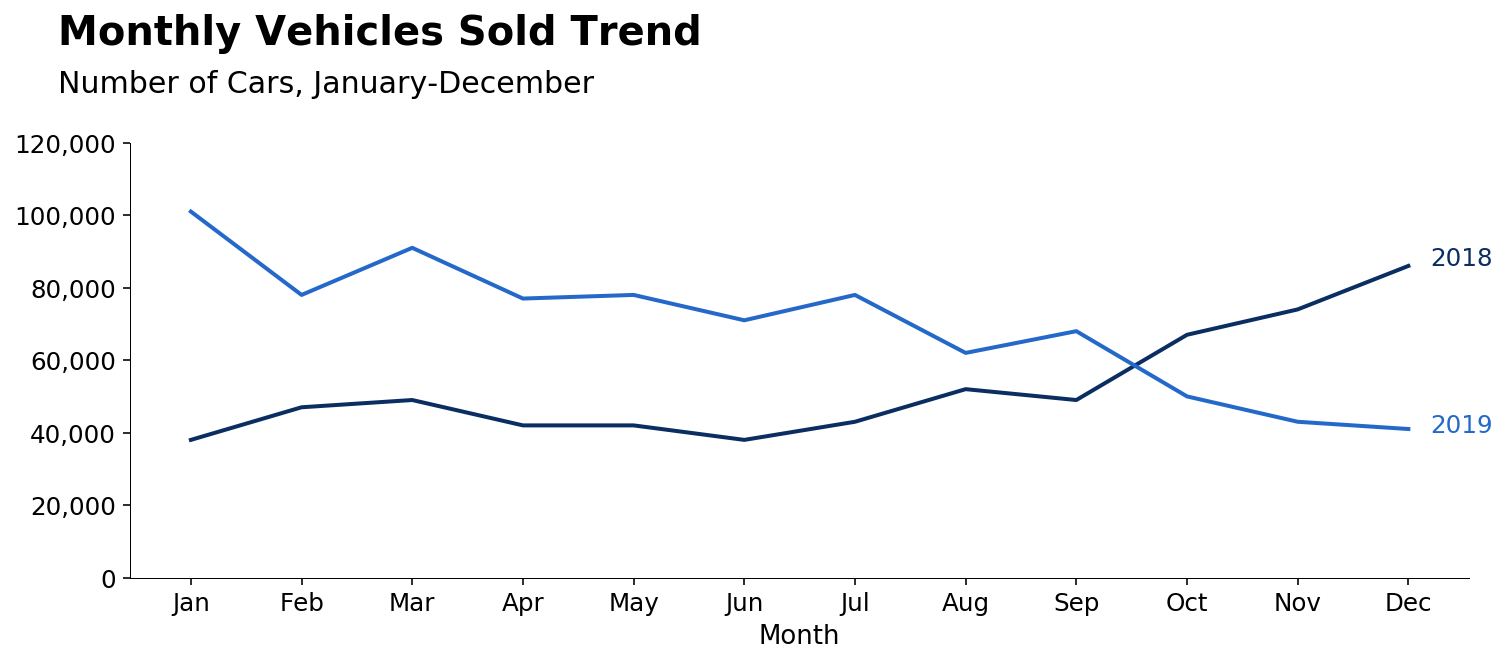

In [2]:
fig, ax = plt.subplots(figsize=(12,4))  #main canvas ax for one line
ax.plot(df_cars['2018k'],color ='#0a2e61',linewidth=2)
ax.plot(df_cars['2019k'],color ='#2469c9',linewidth=2)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],size = 12.3)
ax.set_yticks(np.arange(7))
ax.set_yticklabels(['0','20,000','40,000','60,000','80,000','100,000','120,000'],size = 12.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_xlabel("Month",fontsize=13)
plt.yticks(range(0,130000,20000))
ax.spines['top'].set_visible(False)
ax.annotate('Monthly Vehicles Sold Trend', (-1.2, 147000.7), size=20,  weight='bold',annotation_clip=False)
ax.annotate('Number of Cars, January-December', (-1.2, 134000.3), size=15 ,annotation_clip=False)
ax.annotate("2018", (11.2, 86000.3), size=12.3, color='#0a2e61',annotation_clip=False)
ax.annotate("2019", (11.2, 40000.3), size=12.3, color='#2469c9',annotation_clip=False)
plt.show()

Step 1: Change the X-axis ticks to an abbreviated date, make no rotation.

Step 2: Discard all the outlines and unnecessary grid lines, only keep the bottom and left lines.

Step 3: Discard the marker symbols and value label on lines.

Step 4: Remove the legend and mark the year directly near the lines.

Step 5: Set the title and subtitle to the up-left side.

### Task2
#### Design based on Gestalt principles and preattentive attributes.

<img src="bubble_chart.png" width="450">

#### Despite the above design and create one yourself. Use the REVENUES and PROFITS data for the top 10 companies here to create a visualization.

In [3]:
data = {'Company': ['Walmart', 'Sinopec Group', 'State Grid', "China National Petroleum", 'Royal Dutch Shell', "Saudi Aramco", "Volkswagen", 'BP', 'Amazon', 'Toyota Motor'],
    'Revenue': [523964, 407009, 383906, 379130, 352106, 329784, 282760, 282616, 280522, 275288 ],
    'Profit' : [14881, 6793.2, 7970, 4443.2, 15842, 88210.9, 15542, 4026, 11588, 19096.2]}
df = pd.DataFrame(data)
df['Cost'] = df['Revenue']-df['Profit']
df = df.set_index('Company')
df['Profit_per']= (df['Profit']/df['Revenue'])*100
df['Cost_per']= (df['Cost']/df['Revenue'])*100
#dataset = pd.DataFrame({'Cost': Cost, 'Profit': Profit})
#per= dataset.div(dataset.sum(axis=1), axis=0)
df = df.sort_values(by = 'Profit_per')
low_p=df['Cost_per'].values
high_p=df['Profit_per'].values
df

,Revenue,Profit,Cost,Profit_per,Cost_per
Company,,,,,
China National Petroleum,379130,4443.2,374686.8,1.171946,98.828054
BP,282616,4026.0,278590.0,1.424548,98.575452
Sinopec Group,407009,6793.2,400215.8,1.669054,98.330946
State Grid,383906,7970.0,375936.0,2.076029,97.923971
Walmart,523964,14881.0,509083.0,2.840081,97.159919
Amazon,280522,11588.0,268934.0,4.130870,95.869130
Royal Dutch Shell,352106,15842.0,336264.0,4.499213,95.500787
Volkswagen,282760,15542.0,267218.0,5.496534,94.503466
Toyota Motor,275288,19096.2,256191.8,6.936808,93.063192


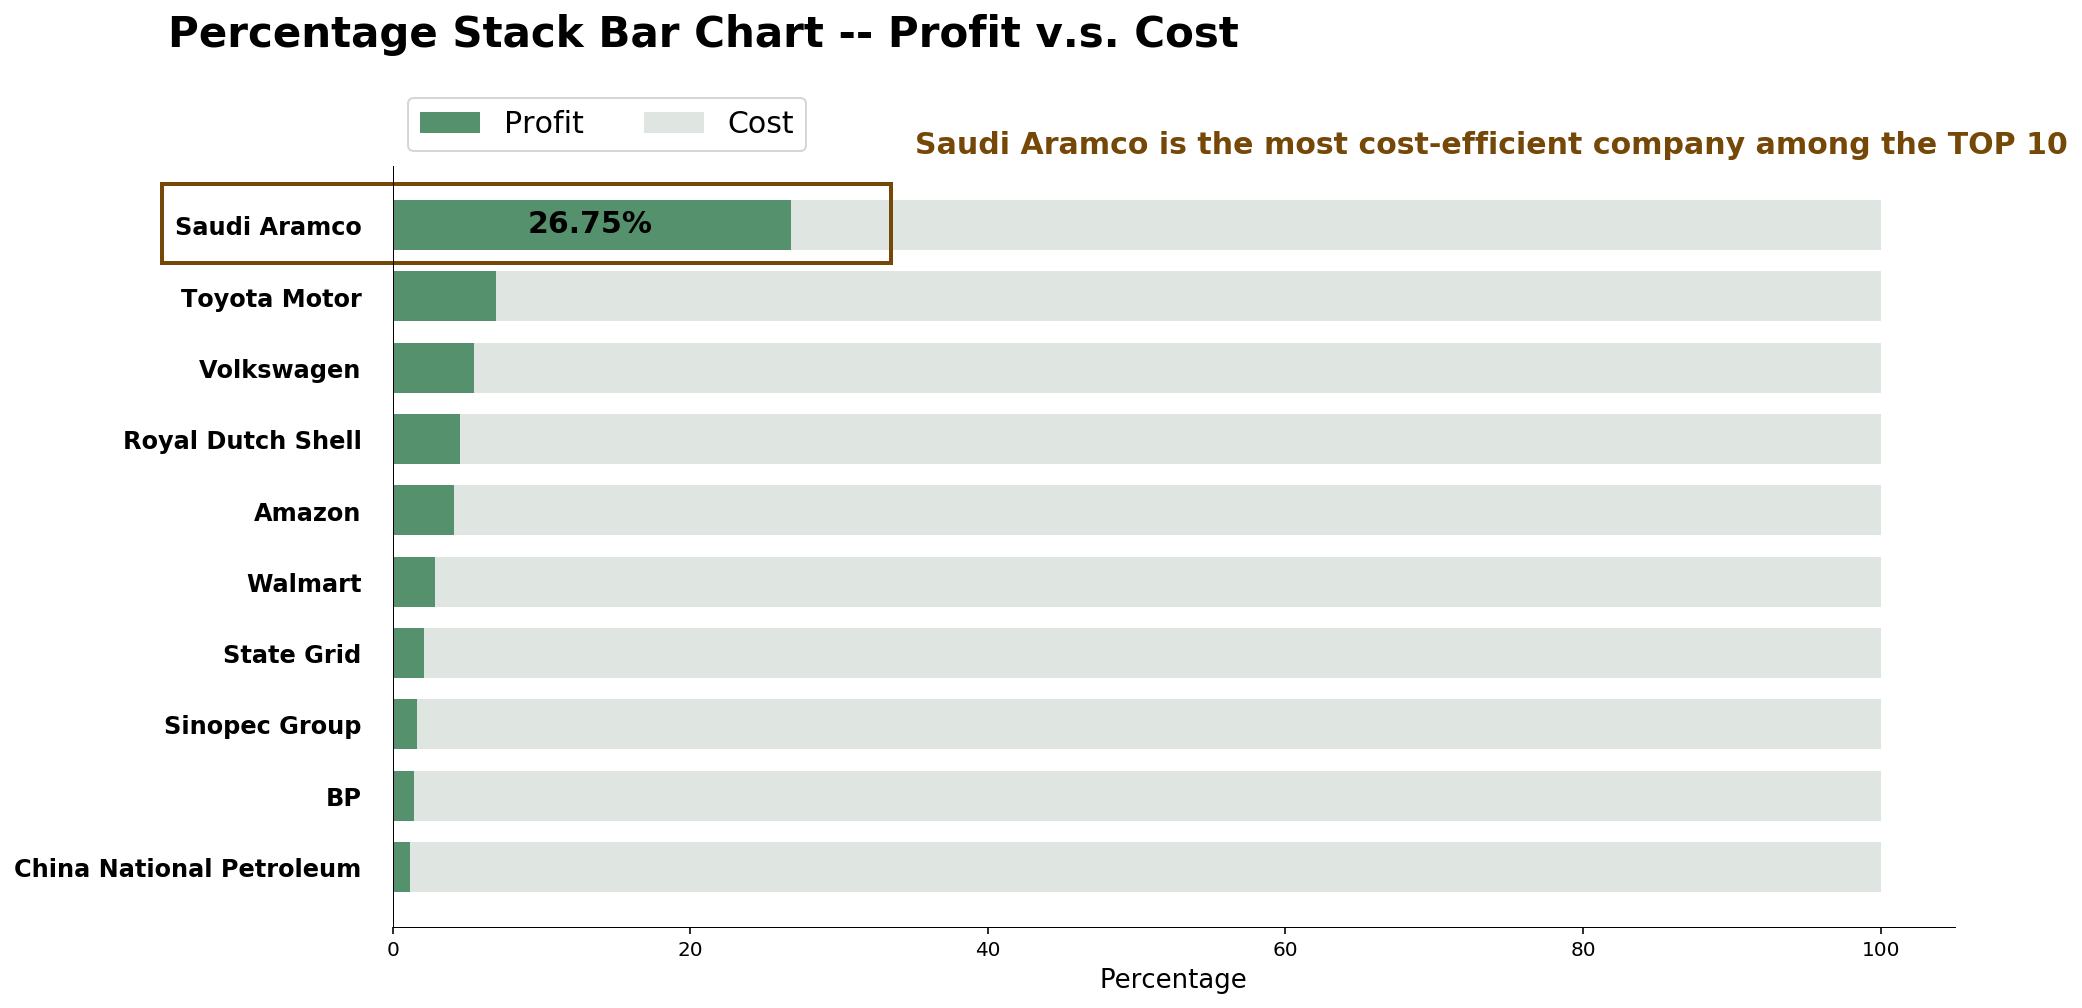

In [4]:
from matplotlib.patches import Rectangle
# stacked bar chart
fig,ax=plt.subplots(figsize=(14,7))

w = 0.7 # Use 25% of each slot (day of week) per bar, leaving 25% for spacing

#start with the bar at bottom
ax.barh(np.arange(10), high_p, label="Profit", color='#56916d',height=w)   ##先画percentage low as one bar

#stack the next bar on top of the bottom
ax.barh(np.arange(10), low_p, left = high_p, label="Cost", color='#dfe6e1',height=w)   ## bottom=low_p 叠加在第一个bar上面
 
#add x ticks
ax.set_yticks(np.arange(10))
ax.tick_params(axis='y',direction='out', pad=12, left=False)
ax.set_yticklabels(['China National Petroleum','BP','Sinopec Group','State Grid','Walmart','Amazon','Royal Dutch Shell','Volkswagen','Toyota Motor','Saudi Aramco'],size =12,weight='bold')
ax.set_xlabel("Percentage",fontsize=13)
#hide border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.legend(bbox_to_anchor=(.0, 1), ncol=2, prop={'size': 15}) 
ax.annotate('26.75%', (9.1, 8.9), size=15 ,annotation_clip=False,color ='black',weight='bold')
ax.add_patch(
    Rectangle(
        xy=(-15.5, 8.47),  # point of origin.
        width= 49,
        height=1.1,
        linewidth=2,
        color='#754808',
        fill=False,
        clip_on=False
    )
)
ax.annotate('Saudi Aramco is the most cost-efficient company among the TOP 10', (35.1, 10), size=15 ,annotation_clip=False,color ='#754808',weight='bold')
ax.annotate('Percentage Stack Bar Chart -- Profit v.s. Cost', (-15.1, 11.5), size=21 ,annotation_clip=False,color ='black',weight='bold')
plt.show()

### Task3 

Use the data set states.csv with the information of population, unemployment rate, homicide rate by states in 2021 however you want to design a visualization presenting the information from the four variables: states, population, unemployment rate and homicidrate. Have a clear goal of information to highlight, ideas include but not limited to relationship between unemployment rate and homicide rate, unemployment rate in different
state, homicide rate in different state, relationship between unemployment rate and population, states with the highest unemployment rate and etc.. 

Requirement:
- presenting the correct data with at lease the four variables: states, population, unemployment rate and homicide rate.
- at least applying the Gestalt principle of simplicity and similarity/proximity (you can choose one or use both)
- picking some key information you want the audience to look at, use preattentive attributes like text, size, position or color to accurately present that information 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
df = pd.read_csv("states.csv")
#pd.plotting.scatter_matrix(df, alpha=0.8,figsize=(12,8),diagonal='hist')
#fig.show()

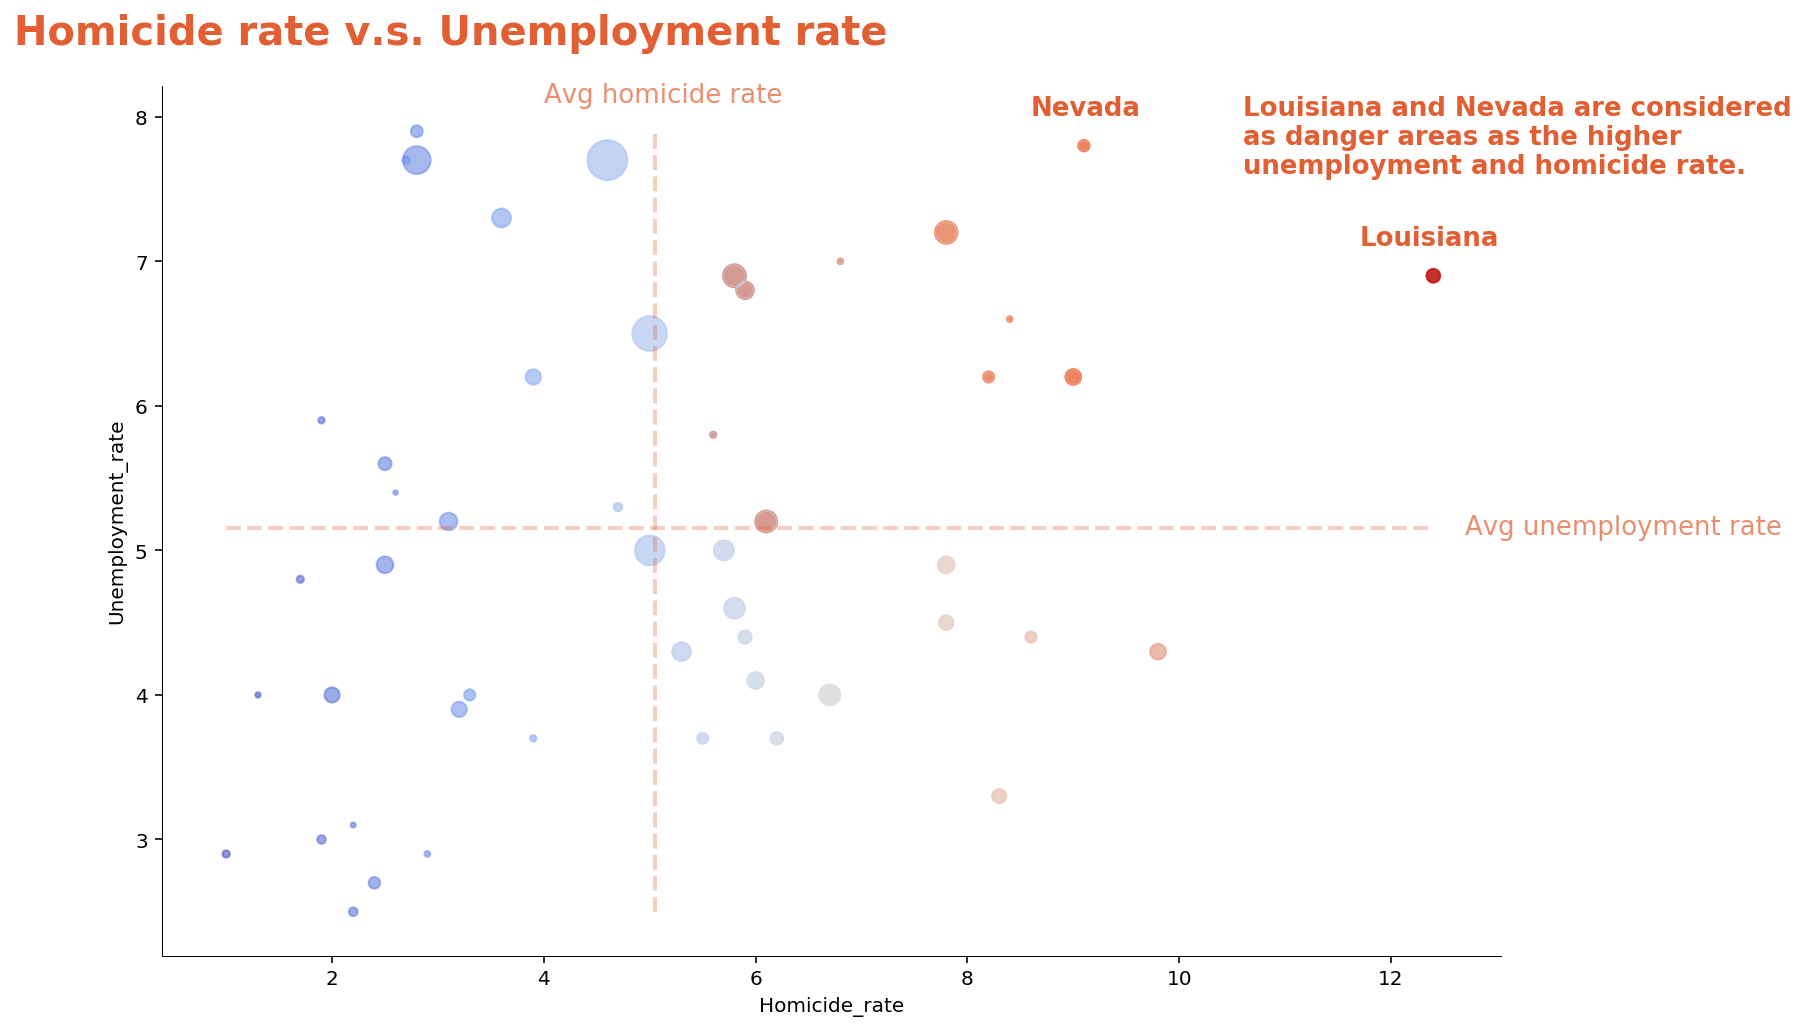

In [31]:
from matplotlib import colors 
fig, ax = plt.subplots(figsize=(12,8))
unemployment = df['Unemployment_rate']
homi = df['Homicide_rate']
my = unemployment.mean()
my2 = homi.mean()
sizes = df['Population']//10**5
cmap = plt.get_cmap('coolwarm')
norm = colors.Normalize(df['Homicide_rate'].min(), df['Homicide_rate'].max()) 
normed = norm(df['Homicide_rate'].values)
ycolors = cmap(normed)
col = np.where((df['Unemployment_rate']<my)|(df['Homicide_rate']<my2), '#E2E5EA', '#E15F32')
ax.scatter(df['Homicide_rate'], df['Unemployment_rate'], c=col, s=sizes)
ax.scatter(df['Homicide_rate'], df['Unemployment_rate'], c=ycolors, s=sizes, alpha=.5)
ax.vlines(x=my2,ymin=unemployment.min(),ymax=unemployment.max(),colors='#E15F32', linestyles='dashed', lw=2, label='Avg Homicide rate',alpha=0.3)
ax.hlines(y=my, xmin=homi.min(), xmax=homi.max(), colors='#E15F32', linestyles='dashed', lw=2, label='Avg unemployment rate',alpha=0.3)
ax.annotate("Avg homicide rate", (4, 8.1), size=13, color='#E15F32',annotation_clip=False,alpha=0.7)
ax.annotate("Avg unemployment rate", (12.7, 5.11), size=13, color='#E15F32',annotation_clip=False,alpha=0.7)
ax.annotate("Louisiana", (11.7, 7.11), size=13, color='#E15F32',annotation_clip=False,weight='bold')
ax.annotate("Nevada", (8.6, 8.01), size=13, color='#E15F32',annotation_clip=False,weight='bold')
ax.annotate("Louisiana and Nevada are considered", (10.6, 8.01), size=13, color='#E15F32',annotation_clip=False,weight='bold')
ax.annotate("as danger areas as the higher ", (10.6, 7.81), size=13, color='#E15F32',annotation_clip=False,weight='bold')
ax.annotate("unemployment and homicide rate.", (10.6, 7.61), size=13, color='#E15F32',annotation_clip=False,weight='bold')
ax.set_xlabel("Homicide_rate")
ax.set_ylabel("Unemployment_rate")
ax.annotate('Homicide rate v.s. Unemployment rate', (-1, 8.5), size=20,  weight='bold',annotation_clip=False,color ='#E15F32')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
plt.show()
## The size of bubble represents the Population.